<a href="https://colab.research.google.com/github/cvillarr123/marketingKPI/blob/main/PROYECTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kneed

In [22]:
#0.- Librerias 

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd 
import random
from google.colab import drive
from google.colab import auth
auth.authenticate_user()
import gspread
#from oauth2client.client import GoogleCredentials
#gc = gspread.authorize(GoogleCredentials.get_application_default())
#drive.mount('/content/drive')
import datetime
import seaborn as sns
import math 
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import plotly.graph_objs as go
import plotly as py
import plotly.express as px
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as pgo
import sklearn.model_selection as model_selection
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import cross_val_score
import sklearn.model_selection as model_selection 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_selector
from sklearn.naive_bayes import ComplementNB 
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.base import TransformerMixin


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



**Datos:**

1.   Year :   Anio de corte
2.   Month :   Mes de corte 
2.   Year&month:  Anio y mes
2.   Adsetstarttime: tiempo de inicio de config de la propaganda
2.   Adsetendtime:  tiempo de fin de la propaganda
2.   Campaignobjective:  objetivo de la campaña
2.   Campaignname:  nombre de la campaña
2.   AdsetID:  identificador de la propaganda
2.   Adsetname: nombre de la propaganda
2.   AdID: id de la propaganda
2.   Promotedposttype: tipo de post de promocion link, video, etc.
2.   Promotedpostmessage: mensaje en el post de promocion
2.   Cost: valor o costo de haber puesto la propaganda
2.   Impressions:  numero de veces que se mostro la propaganda
2.   Reach: numero de personas únicas que vieron la publicacion.
2.   Frequency: veces que ha visto la publicacion frecuencia ( Impressions / Reach )
2.   Adname: nombre de la propaganda
2.   Linkclicks: cuantas veces ha dado click en la publicación
2.   Costperon-Facebooklead : costo por lead (persona q lleno el formulario o consultaron el producto)
2.   Uniqueleads: leads que ha generado

In [23]:
#path='/content/drive/My Drive/PROYECTO DATA SCIENCE/Data/DATA.xlsx'
path='DATA DRIVE.xlsx'
data = pd.read_excel(path,sheet_name='EDAD Y GENERO')
data.sample(10)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Year                             5770 non-null   int64         
 1   Year & month                     5770 non-null   object        
 2   Campaign ID                      5770 non-null   int64         
 3   Campaign name                    5770 non-null   object        
 4   Campaign objective               5770 non-null   object        
 5   Ad set ID                        5770 non-null   int64         
 6   Ad set name                      5770 non-null   object        
 7   Ad ID                            5770 non-null   int64         
 8   Ad name                          5770 non-null   object        
 9   Promoted post type               5770 non-null   object        
 10  Promoted post created date       5770 non-null   datetime64[

In [24]:
filter1 = data.Year == 2021  
filter2 = data.Age != 'Unknown'
filter3 = data["Campaign objective"] == "LEAD_GENERATION"

##filter3 = df_inicial.Month.isin([4,5,6,7])  
data = data[  filter1 & filter2 ]
data.tail()



,Year,Year & month,Campaign ID,Campaign name,Campaign objective,Ad set ID,Ad set name,Ad ID,Ad name,Promoted post type,Promoted post created date,Promoted post description,Promoted post message,Promoted post caption,Ad set start time,Ad set end time,Ad set targeting,Targeting minimum age,Targeting maximum age,Age,Gender,Cost,Impressions,Reach,Frequency,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead
5765,2021,2021|07,23847715375640753,BASICA_awareness_drive,LINK_CLICKS,23847715389650753,seguidores_pagina_lookalike1%,23847863094830753,Drive_awareness_beneficios_tecnología_25_Junio...,video,2021-06-30,NaN,"Desde $0,55 al día, evita que esto te pase. #C...",Siéntete seguro con CarSync,2021-06-08,NaT,"{""age_max"":65,""age_min"":25,""custom_audiences"":...",25,65,45-54,male,0.09,54,53,1.02,1,0,1.67,NaN
5766,2021,2021|07,23847715375640753,BASICA_awareness_drive,LINK_CLICKS,23847715389650753,seguidores_pagina_lookalike1%,23847863094830753,Drive_awareness_beneficios_tecnología_25_Junio...,video,2021-06-30,NaN,"Desde $0,55 al día, evita que esto te pase. #C...",Siéntete seguro con CarSync,2021-06-08,NaT,"{""age_max"":65,""age_min"":25,""custom_audiences"":...",25,65,55-64,female,0.03,20,19,1.05,2,0,1.50,NaN
5767,2021,2021|07,23847715375640753,BASICA_awareness_drive,LINK_CLICKS,23847715389650753,seguidores_pagina_lookalike1%,23847863094830753,Drive_awareness_beneficios_tecnología_25_Junio...,video,2021-06-30,NaN,"Desde $0,55 al día, evita que esto te pase. #C...",Siéntete seguro con CarSync,2021-06-08,NaT,"{""age_max"":65,""age_min"":25,""custom_audiences"":...",25,65,55-64,male,0.09,69,68,1.01,3,0,1.30,NaN
5768,2021,2021|07,23847715375640753,BASICA_awareness_drive,LINK_CLICKS,23847715389650753,seguidores_pagina_lookalike1%,23847863094830753,Drive_awareness_beneficios_tecnología_25_Junio...,video,2021-06-30,NaN,"Desde $0,55 al día, evita que esto te pase. #C...",Siéntete seguro con CarSync,2021-06-08,NaT,"{""age_max"":65,""age_min"":25,""custom_audiences"":...",25,65,65+,female,0.04,13,13,1.00,4,0,3.08,NaN
5769,2021,2021|07,23847715375640753,BASICA_awareness_drive,LINK_CLICKS,23847715389650753,seguidores_pagina_lookalike1%,23847863094830753,Drive_awareness_beneficios_tecnología_25_Junio...,video,2021-06-30,NaN,"Desde $0,55 al día, evita que esto te pase. #C...",Siéntete seguro con CarSync,2021-06-08,NaT,"{""age_max"":65,""age_min"":25,""custom_audiences"":...",25,65,65+,male,0.06,45,43,1.05,4,0,1.33,NaN


In [25]:
# remover espacios en el nombre de las columnas
data.columns = data.columns.str.replace(' ', '')

# Click-through-rate  Porcentaje de las impresiones que se volvieron clicks
data['CTR'] = data['Linkclicks'] / data['Impressions'] *100
data.tail()

,Year,Year&month,CampaignID,Campaignname,Campaignobjective,AdsetID,Adsetname,AdID,Adname,Promotedposttype,Promotedpostcreateddate,Promotedpostdescription,Promotedpostmessage,Promotedpostcaption,Adsetstarttime,Adsetendtime,Adsettargeting,Targetingminimumage,Targetingmaximumage,Age,Gender,Cost,Impressions,Reach,Frequency,Linkclicks,Uniqueleads,CPM(costper1000impressions),Costperon-Facebooklead,CTR
5765,2021,2021|07,23847715375640753,BASICA_awareness_drive,LINK_CLICKS,23847715389650753,seguidores_pagina_lookalike1%,23847863094830753,Drive_awareness_beneficios_tecnología_25_Junio...,video,2021-06-30,NaN,"Desde $0,55 al día, evita que esto te pase. #C...",Siéntete seguro con CarSync,2021-06-08,NaT,"{""age_max"":65,""age_min"":25,""custom_audiences"":...",25,65,45-54,male,0.09,54,53,1.02,1,0,1.67,NaN,1.851852
5766,2021,2021|07,23847715375640753,BASICA_awareness_drive,LINK_CLICKS,23847715389650753,seguidores_pagina_lookalike1%,23847863094830753,Drive_awareness_beneficios_tecnología_25_Junio...,video,2021-06-30,NaN,"Desde $0,55 al día, evita que esto te pase. #C...",Siéntete seguro con CarSync,2021-06-08,NaT,"{""age_max"":65,""age_min"":25,""custom_audiences"":...",25,65,55-64,female,0.03,20,19,1.05,2,0,1.50,NaN,10.000000
5767,2021,2021|07,23847715375640753,BASICA_awareness_drive,LINK_CLICKS,23847715389650753,seguidores_pagina_lookalike1%,23847863094830753,Drive_awareness_beneficios_tecnología_25_Junio...,video,2021-06-30,NaN,"Desde $0,55 al día, evita que esto te pase. #C...",Siéntete seguro con CarSync,2021-06-08,NaT,"{""age_max"":65,""age_min"":25,""custom_audiences"":...",25,65,55-64,male,0.09,69,68,1.01,3,0,1.30,NaN,4.347826
5768,2021,2021|07,23847715375640753,BASICA_awareness_drive,LINK_CLICKS,23847715389650753,seguidores_pagina_lookalike1%,23847863094830753,Drive_awareness_beneficios_tecnología_25_Junio...,video,2021-06-30,NaN,"Desde $0,55 al día, evita que esto te pase. #C...",Siéntete seguro con CarSync,2021-06-08,NaT,"{""age_max"":65,""age_min"":25,""custom_audiences"":...",25,65,65+,female,0.04,13,13,1.00,4,0,3.08,NaN,30.769231
5769,2021,2021|07,23847715375640753,BASICA_awareness_drive,LINK_CLICKS,23847715389650753,seguidores_pagina_lookalike1%,23847863094830753,Drive_awareness_beneficios_tecnología_25_Junio...,video,2021-06-30,NaN,"Desde $0,55 al día, evita que esto te pase. #C...",Siéntete seguro con CarSync,2021-06-08,NaT,"{""age_max"":65,""age_min"":25,""custom_audiences"":...",25,65,65+,male,0.06,45,43,1.05,4,0,1.33,NaN,8.888889


Incluir el numero de palabras

In [26]:
data['NumPalabras'] = data.Promotedpostmessage.str.split().str.len()

Borrar los que no tienen Edad

In [27]:
#borrar los que tienen Unknown en Age
data = data[data.Age != 'Unknown']

In [28]:
data =data.dropna(subset=["Costperon-Facebooklead"])
q1= np.percentile(data["Costperon-Facebooklead"], 25)  
q2= np.percentile(data["Costperon-Facebooklead"], 50)
q3= np.percentile(data["Costperon-Facebooklead"], 75) 

data['Clasificacion'] = "Ninguno"
data['ClasificacionInt'] = 0

In [29]:
data['Clasificacion'].loc[(data['Costperon-Facebooklead']<= q1)] = "Mejores"
data['Clasificacion'].loc[(data['Costperon-Facebooklead']> q1 ) & (data['Costperon-Facebooklead'] <= q3)] = "Regulares"
data['Clasificacion'].loc[(data['Costperon-Facebooklead']> q3 )] = "Peores"


data['ClasificacionInt'].loc[(data['Costperon-Facebooklead']<= q1)] = 2
data['ClasificacionInt'].loc[(data['Costperon-Facebooklead']> q1 ) & (data['Costperon-Facebooklead'] <= q3)] = 1
data['ClasificacionInt'].loc[(data['Costperon-Facebooklead']> q3 )] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A v

In [30]:
data.head(5)

,Year,Year&month,CampaignID,Campaignname,Campaignobjective,AdsetID,Adsetname,AdID,Adname,Promotedposttype,Promotedpostcreateddate,Promotedpostdescription,Promotedpostmessage,Promotedpostcaption,Adsetstarttime,Adsetendtime,Adsettargeting,Targetingminimumage,Targetingmaximumage,Age,Gender,Cost,Impressions,Reach,Frequency,Linkclicks,Uniqueleads,CPM(costper1000impressions),Costperon-Facebooklead,CTR,NumPalabras,Clasificacion,ClasificacionInt
389,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,2021-03-17,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,0.32,226,193,1.17,3,1,1.42,0.32,1.327434,25,Mejores,2
399,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,2021-04-01,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,male,4.60,4608,2525,1.82,14,3,1.00,1.53,0.303819,48,Regulares,1
401,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,2021-04-01,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,female,3.67,1749,1172,1.49,4,2,2.10,1.84,0.228702,48,Regulares,1
402,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,2021-04-01,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,21.01,15951,9362,1.70,73,8,1.32,2.63,0.457652,48,Regulares,1
404,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,2021-04-01,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,35-44,female,1.94,795,516,1.54,10,3,2.44,0.65,1.257862,48,Mejores,2


In [31]:
# añadir edad mediana y codigo de género para concatenarlo al Ad set ID y hacerlo unico
import plotly.express as px

fig1 = px.bar(data, x='Age', y='Uniqueleads', height=300,
              title='Stacked Bar Chart - Hover on individual items')
fig2 = px.histogram(data, x='Age', y='Uniqueleads', histfunc='sum', height=300,
                    title='Histogram Chart')
fig1.show()
fig2.show()

In [32]:
# añadir edad mediana y codigo de género para concatenarlo al Ad set ID y hacerlo unico
import plotly.express as px

fig1 = px.bar(data, x='Clasificacion', y='Uniqueleads', height=300,
              title='Stacked Bar Chart - Hover on individual items')
fig2 = px.histogram(data, x='Clasificacion', y='Uniqueleads', histfunc='sum', height=300,
                    title='Histogram Chart')
fig1.show()
fig2.show()

In [33]:
fig1= px.histogram(data, x='Age', y='Uniqueleads', histfunc='sum', height=300,
                    title='Histogram Chart')
fig1.show()


In [34]:
# añadir edad mediana y codigo de género para concatenarlo al Ad set ID y hacerlo unico
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(go.Histogram(
    x=np.log(data[data.Gender=='male']['Uniqueleads']),
    bingroup=1))

fig.add_trace(go.Histogram(
    x=np.log(data[data.Gender=='female']['Uniqueleads']),
    bingroup=1))

fig.update_layout(
    barmode="overlay",
    title="Histograma del Log de Uniqueleads",
    bargap=0.1)

fig.show()

# AEDA

https://rpubs.com/nicokaswalder/614266


https://www.kaggle.com/marcogdepinto/2016-presidential-elections-on-facebook


In [35]:
data.describe()

,Year,CampaignID,AdsetID,AdID,Targetingminimumage,Targetingmaximumage,Cost,Impressions,Reach,Frequency,Linkclicks,Uniqueleads,CPM(costper1000impressions),Costperon-Facebooklead,CTR,NumPalabras,ClasificacionInt
count,534.0,5.340000e+02,5.340000e+02,5.340000e+02,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,2021.0,2.384592e+16,2.384640e+16,2.384684e+16,22.505618,56.091760,14.122097,7623.638577,4243.975655,1.564139,43.243446,6.245318,2.300356,2.289419,0.942549,34.853933,1.000000
std,0.0,1.587422e+11,8.117494e+11,6.967310e+11,1.433637,9.657406,24.865132,14721.019120,7292.928345,0.447484,76.624818,11.086295,1.539774,1.747724,1.566927,10.315893,0.709094
min,2021.0,2.384591e+16,2.384591e+16,2.384591e+16,18.000000,44.000000,0.020000,4.000000,3.000000,1.000000,0.000000,1.000000,0.750000,0.020000,0.000000,1.000000,0.000000
25%,2021.0,2.384591e+16,2.384591e+16,2.384615e+16,21.000000,44.000000,1.760000,788.000000,552.000000,1.240000,5.000000,1.000000,1.510000,1.145000,0.426962,30.000000,0.250000
50%,2021.0,2.384591e+16,2.384591e+16,2.384664e+16,23.000000,65.000000,4.790000,2544.000000,1653.500000,1.450000,14.000000,2.000000,1.930000,1.910000,0.593238,31.000000,1.000000
75%,2021.0,2.384591e+16,2.384643e+16,2.384768e+16,23.000000,65.000000,14.767500,7950.250000,4732.000000,1.770000,43.750000,6.000000,2.737500,3.007500,0.984685,42.000000,1.750000
max,2021.0,2.384775e+16,2.384805e+16,2.384808e+16,25.000000,65.000000,214.980000,147944.000000,67398.000000,3.900000,567.000000,96.000000,27.500000,11.390000,25.000000,56.000000,2.000000


In [36]:
missing_values_count = data.isnull().sum()

In [37]:
missing_values_count[0:32]

Year                             0
Year&month                       0
CampaignID                       0
Campaignname                     0
Campaignobjective                0
AdsetID                          0
Adsetname                        0
AdID                             0
Adname                           0
Promotedposttype                 0
Promotedpostcreateddate          0
Promotedpostdescription         52
Promotedpostmessage              0
Promotedpostcaption              0
Adsetstarttime                   0
Adsetendtime                   530
Adsettargeting                   0
Targetingminimumage              0
Targetingmaximumage              0
Age                              0
Gender                           0
Cost                             0
Impressions                      0
Reach                            0
Frequency                        0
Linkclicks                       0
Uniqueleads                      0
CPM(costper1000impressions)      0
Costperon-Facebookle

Correlation Matrix



In [102]:
numerical_columns = ["Impressions","Linkclicks","Cost","CPM(costper1000impressions)","CTR","Reach","Frequency","NumPalabras"]
labels = ["ClasificacionInt"]
categorical_columns = ["Promotedposttype","Gender","Age"]
all_features = ["Promotedposttype","Gender","Age","Impressions","Linkclicks","Cost","CPM(costper1000impressions)","CTR","Reach","Frequency","NumPalabras","Uniqueleads"]



In [91]:
numerical_columns

['Impressions',
 'Linkclicks',
 'Cost',
 'CPM(costper1000impressions)',
 'CTR',
 'Reach',
 'Frequency',
 'NumPalabras',
 'Uniqueleads']

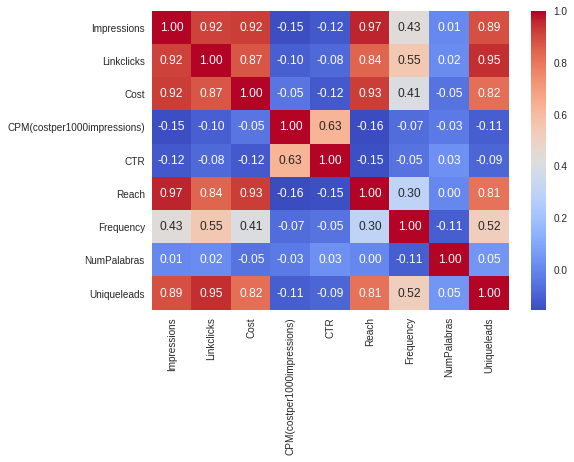

In [92]:
g=sns.heatmap(data[numerical_columns].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

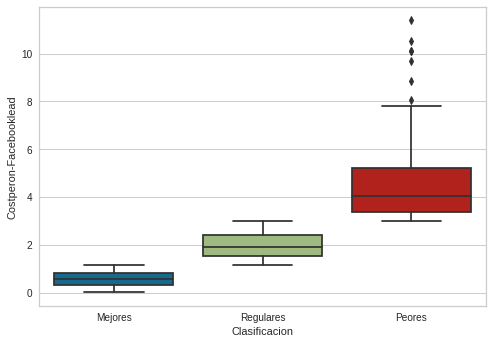

In [93]:
 sns.boxplot(y= data["Costperon-Facebooklead"] , x= data.Clasificacion, orient="v")

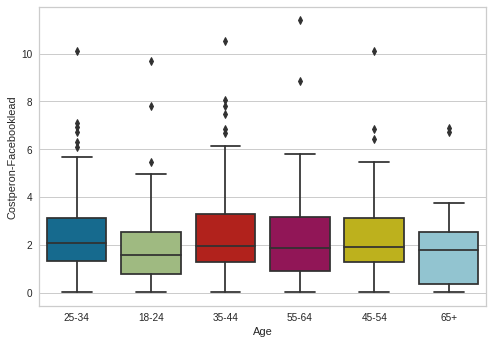

In [94]:
 sns.boxplot(y= data["Costperon-Facebooklead"] , x= data.Age, orient="v")

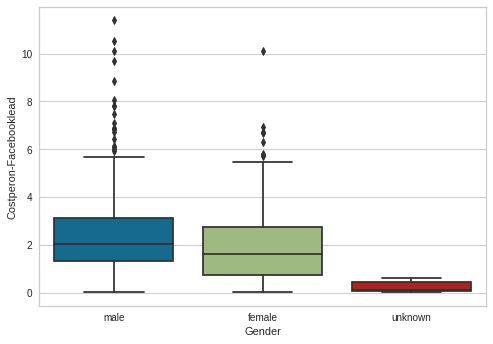

In [95]:
 sns.boxplot(y= data["Costperon-Facebooklead"] , x= data.Gender, orient="v")

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log



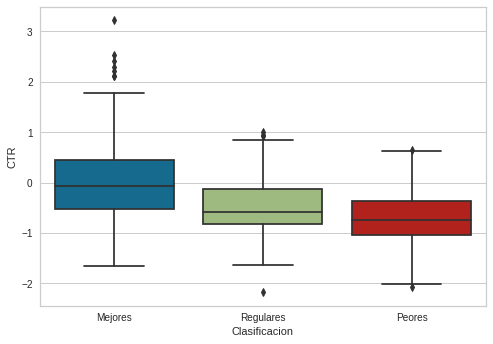

In [96]:
 sns.boxplot(y= np.log(data["CTR"]) , x= data.Clasificacion, orient="v")

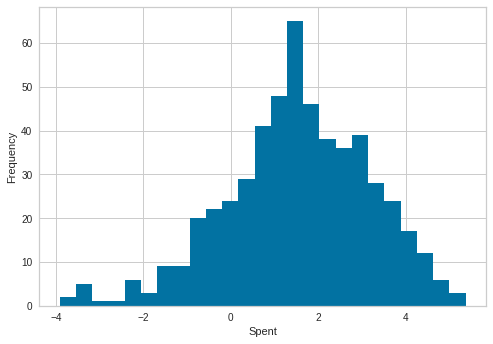

In [97]:
plt.hist(np.log(data['Cost']), bins = 25)
plt.xlabel("Spent")
plt.ylabel("Frequency")
plt.show()

In [98]:
X = data[all_features]
y = data[labels]
all_features

['Promotedposttype',
 'Gender',
 'Age',
 'Impressions',
 'Linkclicks',
 'Cost',
 'CPM(costper1000impressions)',
 'CTR',
 'Reach',
 'Frequency',
 'NumPalabras',
 'Uniqueleads']

In [103]:
#
# Create training/ test data split
#
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [104]:
X_train.shape


(373, 12)

In [105]:
y_train.shape

(373, 1)

In [106]:
type(X_train)

pandas.core.frame.DataFrame

In [107]:
prep = ColumnTransformer([('encoder', OneHotEncoder(), categorical_columns),
                   ('scaler', StandardScaler(),numerical_columns),],
                  remainder= 'drop')

In [108]:
numerical_columns

['Impressions',
 'Linkclicks',
 'Cost',
 'CPM(costper1000impressions)',
 'CTR',
 'Reach',
 'Frequency',
 'NumPalabras']

In [109]:
prep


ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('encoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 ['Promotedposttype', 'Gender', 'Age']),
                                ('scaler',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 ['Impressions', 'Linkclicks', 'Cost',
                                  'CPM(costper1000impressions)', 'CTR', 'Reach',
                                  'Frequency', 'NumPalabras'])],
                  verbose=False)

### Croosvalidacion

In [110]:
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=123)

In [111]:
cv

RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=123)

# CLASIFICACION


## Random Forest

In [112]:
model = RandomForestClassifier()


In [118]:
X_train.head()

,Promotedposttype,Gender,Age,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras
4693,link,male,35-44,409,5,2.46,6.01,1.222494,396,1.03,33
3892,link,male,25-34,55014,211,97.32,1.77,0.383539,33507,1.64,31
552,link,male,55-64,262,4,0.54,2.06,1.526718,232,1.13,44
4132,link,male,18-24,2558,12,2.87,1.12,0.469116,2112,1.21,39
4725,link,female,45-54,267,1,1.74,6.52,0.374532,168,1.59,42


In [114]:
y_train

,ClasificacionInt
4693,1
3892,1
552,2
4132,1
4725,1
...,...
2866,0
3803,2
4179,0
1768,2


In [119]:
X_train_cp = X_train.copy()

X_train_cp = X_train_cp.drop('Uniqueleads',1)

In [115]:
grid = {'n_estimators' : [200], 'max_depth' : [3,4] , 'random_state' : [123]}

In [120]:
test_scores = []
#
for g in ParameterGrid(grid) :
  print(g)
  model.set_params(**g)
  reglog = Pipeline([('preproc', prep),
                  ('regLog', model)])

  
  reglog.fit(X_train_cp, y_train)

  test_scores.append(reglog.score(X_test,y_test))
  
  best_idx = np.argmax(test_scores)
  print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

{'max_depth': 3, 'n_estimators': 200, 'random_state': 123}


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning:

Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.6645962732919255 {'random_state': 123, 'n_estimators': 200, 'max_depth': 3}
{'max_depth': 4, 'n_estimators': 200, 'random_state': 123}
0.6770186335403726 {'random_state': 123, 'n_estimators': 200, 'max_depth': 4}


/usr/local/lib/python3.7/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning:

Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.



In [121]:
ParameterGrid(grid)[best_idx]

{'max_depth': 4, 'n_estimators': 200, 'random_state': 123}

In [122]:
  model = RandomForestClassifier(max_depth= 4, n_estimators = 200, random_state= 123)
  reglog = Pipeline([('preproc', prep),
                  ('regLog', model)])

In [123]:
reglog.fit(X_train_cp, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Pipeline(memory=None,
         steps=[('preproc',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('encoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Promotedposttype', 'Gender',
                                                   'Age']),
                                                 ('scaler',
                                                  StandardScaler(copy=True,
         

In [124]:
metrics.accuracy_score(y_train, reglog.predict(X_train_cp))

0.739946380697051

In [125]:
confusion_matrix(y_train, reglog.predict(X_train_cp))

array([[ 17,  77,   0],
       [  0, 186,   0],
       [  0,  20,  73]])

In [126]:
print( classification_report(y_train, reglog.predict(X_train_cp)) )

              precision    recall  f1-score   support

           0       1.00      0.18      0.31        94
           1       0.66      1.00      0.79       186
           2       1.00      0.78      0.88        93

    accuracy                           0.74       373
   macro avg       0.89      0.66      0.66       373
weighted avg       0.83      0.74      0.69       373



In [69]:
X_test.head()

,Promotedposttype,Gender,Age,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras
484,link,female,18-24,505,3,0.47,0.93,0.594059,232,2.18,46
5420,link,male,25-34,5288,17,6.68,1.26,0.321483,2669,1.98,22
5488,link,female,45-54,342,1,0.82,2.40,0.292398,168,2.04,1
3446,link,male,35-44,17448,124,34.46,1.97,0.710683,11170,1.56,31
3746,link,female,25-34,2197,14,6.71,3.05,0.637233,1368,1.61,46


In [130]:
X_test_cp = X_test.copy()
X_test_cp = X_test_cp.drop('Uniqueleads',1)
y_pred=reglog.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning:

Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.



In [131]:
X_test_cp.dtypes

Promotedposttype                object
Gender                          object
Age                             object
Impressions                      int64
Linkclicks                       int64
Cost                           float64
CPM(costper1000impressions)    float64
CTR                            float64
Reach                            int64
Frequency                      float64
NumPalabras                      int64
dtype: object

In [132]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6770186335403726


In [72]:
y_test.head()

,ClasificacionInt
484,2
5420,0
5488,2
3446,1
3746,2


In [133]:
evaluate_pd = X_test.copy()

In [134]:
evaluate_pd['y_test'] = y_test.ClasificacionInt

In [135]:
evaluate_pd['y_pred'] = y_pred

In [136]:
evaluate_pd.dtypes

Promotedposttype                object
Gender                          object
Age                             object
Impressions                      int64
Linkclicks                       int64
Cost                           float64
CPM(costper1000impressions)    float64
CTR                            float64
Reach                            int64
Frequency                      float64
NumPalabras                      int64
Uniqueleads                      int64
y_test                           int64
y_pred                           int64
dtype: object

In [137]:
import plotly.express as px

fig = px.scatter(evaluate_pd, x="Cost", y="Uniqueleads", color="y_test",
                 size='Cost', hover_data=['Frequency'])
fig.show()

In [138]:
import plotly.express as px

fig = px.scatter(evaluate_pd, x="Cost", y="Uniqueleads", color="y_pred",
                 size='Cost', hover_data=['Frequency'])
fig.show()

In [322]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

NameError: ignored

## Logistic regression multinomial

In [140]:
X_train_cp.dtypes

Promotedposttype                object
Gender                          object
Age                             object
Impressions                      int64
Linkclicks                       int64
Cost                           float64
CPM(costper1000impressions)    float64
CTR                            float64
Reach                            int64
Frequency                      float64
NumPalabras                      int64
dtype: object

In [141]:
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:

reglog = Pipeline([('preproc', prep),
                  ('regLog', model)])


In [143]:
reglog.fit(X_train_cp, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Pipeline(memory=None,
         steps=[('preproc',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('encoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Promotedposttype', 'Gender',
                                                   'Age']),
                                                 ('scaler',
                                                  StandardScaler(copy=True,
         

In [144]:
metrics.accuracy_score(y_train, reglog.predict(X_train_cp))

0.6193029490616622

In [145]:
confusion_matrix(y_train, reglog.predict(X_train_cp))

array([[ 22,  71,   1],
       [ 11, 157,  18],
       [  2,  39,  52]])

In [146]:
print( classification_report(y_train, reglog.predict(X_train_cp)) )

              precision    recall  f1-score   support

           0       0.63      0.23      0.34        94
           1       0.59      0.84      0.69       186
           2       0.73      0.56      0.63        93

    accuracy                           0.62       373
   macro avg       0.65      0.55      0.56       373
weighted avg       0.63      0.62      0.59       373



In [147]:
X_test_cp.dtypes

Promotedposttype                object
Gender                          object
Age                             object
Impressions                      int64
Linkclicks                       int64
Cost                           float64
CPM(costper1000impressions)    float64
CTR                            float64
Reach                            int64
Frequency                      float64
NumPalabras                      int64
dtype: object

In [148]:
y_pred = reglog.predict(X_test_cp)

In [149]:
type(y_pred)

numpy.ndarray

In [152]:
y_predict_prob = reglog.predict_proba(X_test_cp)

In [153]:
y_predict_prob[0]

array([0.09991327, 0.39677487, 0.50331186])

In [333]:
# Revision de una variable contra la otra

# Clusterizacion

https://www.kaggle.com/prashant111/k-means-clustering-with-python

In [334]:
list_cols = numerical_columns
list_cols

['Impressions',
 'Linkclicks',
 'Cost',
 'CPM(costper1000impressions)',
 'CTR',
 'Reach',
 'Frequency',
 'NumPalabras']

In [335]:
# Select the ones you want
df_features = data[list_cols]

In [336]:
df_features.head(10)

,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras
389,226,3,0.32,1.42,1.327434,193,1.17,25
399,4608,14,4.60,1.00,0.303819,2525,1.82,48
401,1749,4,3.67,2.10,0.228702,1172,1.49,48
402,15951,73,21.01,1.32,0.457652,9362,1.70,48
404,795,10,1.94,2.44,1.257862,516,1.54,48
405,6530,47,12.41,1.90,0.719755,4069,1.60,48
408,2849,15,2.72,0.96,0.526501,2012,1.42,40
410,985,3,1.79,1.82,0.304569,796,1.24,40
411,8584,48,10.31,1.20,0.559180,6173,1.39,40
414,2202,11,3.59,1.63,0.499546,1672,1.32,40


## **EDA**

Revisar la matriz de distancias (pendiente la version en Python)

Revisar la correlacion de las variables

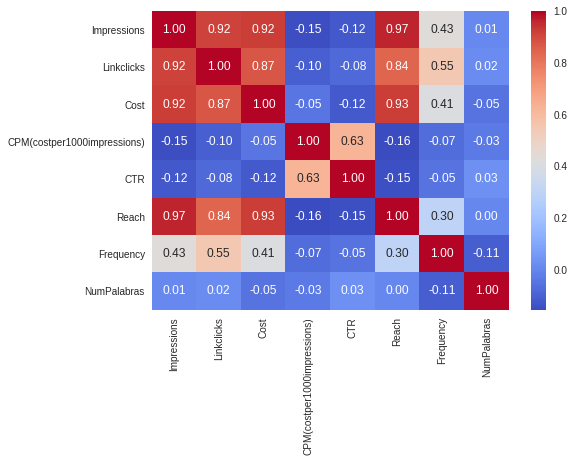

In [337]:
g=sns.heatmap(df_features[list_cols].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

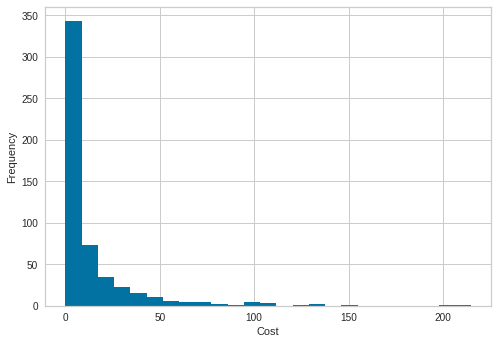

In [338]:
# histograma del costo  pagado por la publicacion
plt.hist(df_features['Cost'], bins = 25)
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.show()

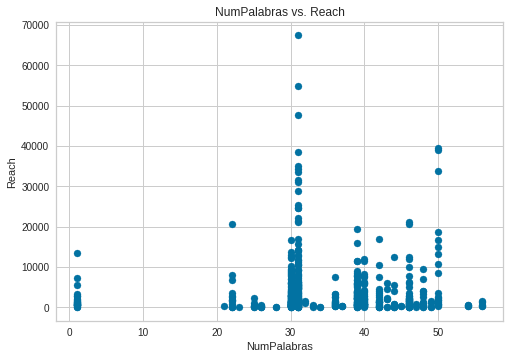

In [339]:
# Revisar la relación entre el numero de palabras de la publicación y los anuncios visualizados
plt.scatter(df_features["NumPalabras"], df_features["Reach"])
plt.title("NumPalabras vs. Reach")
plt.xlabel("NumPalabras")
plt.ylabel("Reach")
plt.show()

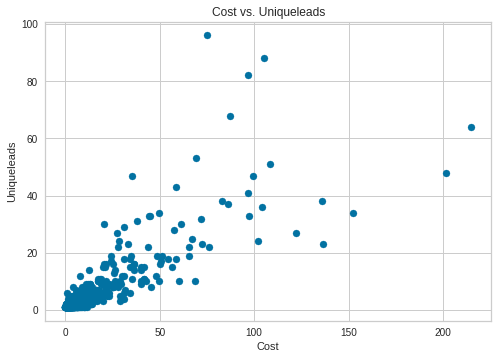

In [341]:
plt.scatter(data["Cost"], data["Uniqueleads"])
plt.title("Cost vs. Uniqueleads")
plt.xlabel("Cost")
plt.ylabel("Uniqueleads")
plt.show()

In [342]:
fig = px.histogram(df_features,x='Cost',nbins=25,title='Histograma',)
fig.show()

Poner en escala estandar la data

In [344]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

In [345]:
df_scaled_features = pd.DataFrame(data=scaled_features, columns=list_cols)

In [375]:
df_scaled_features.head()

,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras
0,-0.502993,-0.525694,-0.555599,-0.572279,0.245861,-0.555987,-0.881613,-0.956114
1,-0.205045,-0.382002,-0.383309,-0.845302,-0.408014,-0.235925,0.572313,1.275546
2,-0.399439,-0.512631,-0.420746,-0.130242,-0.455998,-0.421622,-0.165834,1.275546
3,0.566209,0.388705,0.277270,-0.637285,-0.309748,0.702437,0.303896,1.275546
4,-0.464305,-0.434254,-0.490386,0.090776,0.201419,-0.511656,-0.053993,1.275546


## Usando K-means

Metodo de Elbow para Escoger el número de clusters

In [346]:
kmeans_kwargs = {
   ...:     "init": "random",
   ...:     "n_init": 10,
   ...:     "max_iter": 300,
   ...:     "random_state": 42,
   ...: }

In [347]:
  ...: # Una lista de valores para WSSE values for each k
   ...: sse = []
   ...: for k in range(1, 11):
   ...:     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   ...:     kmeans.fit(scaled_features)
   ...:     sse.append(kmeans.inertia_)
   ...:     print('WSS '+ str(k) + ':' + str(kmeans.inertia_) )

WSS 1:4272.0
WSS 2:2873.497892782259
WSS 3:2440.025510399217
WSS 4:2027.5381095952364
WSS 5:1746.2343319597646
WSS 6:1574.599350797746
WSS 7:1439.3030468971406
WSS 8:1322.7370463356397
WSS 9:1248.9495725369386
WSS 10:956.9615704718665


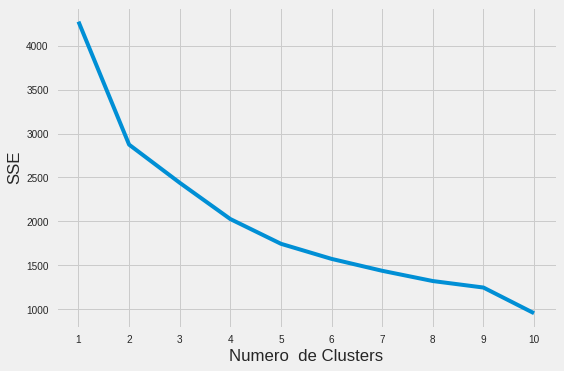

In [348]:
# Metodo del codo  en otros se llama wss

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Numero  de Clusters")
plt.ylabel("SSE")
plt.show()

In [349]:
kl = KneeLocator(
range(1, 11), sse, curve="convex", direction="decreasing")

In [350]:
kl.elbow

4

In [351]:
kmeans = KMeans(
init="random",
n_clusters=3,
n_init=10,
max_iter=300,
random_state=42
)

In [352]:
y_kmeans = kmeans.fit(scaled_features)

In [353]:
# The lowest SSE value
   ...: kmeans.inertia_

2440.025510399217

In [354]:
 # Final locations of the centroid
   ...: kmeans.cluster_centers_

array([[ 0.84808278,  1.07563021,  0.99393289, -0.12097709, -0.13951017,
         0.80072694,  1.25055532, -0.11631414],
       [-0.32862365, -0.35708626, -0.34843827,  0.03732742,  0.03830088,
        -0.31620932, -0.29201692,  0.02383068],
       [ 4.54548089,  4.04542907,  4.27021131, -0.37336269, -0.29390626,
         4.46261233,  1.1568664 , -0.01170159]])

In [355]:
# The number of iterations required to converge
   ...: kmeans.n_iter_

17

In [356]:
df_scaled_features_new = df_scaled_features.copy()

In [357]:
df_features_new = df_features.copy()

In [369]:
df_features_new['labels']  =  y_kmeans.fit_predict(scaled_features)
data['labels'] = y_kmeans.fit_predict(scaled_features)

In [359]:
df_features_new.head()

,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras,labels
389,226,3,0.32,1.42,1.327434,193,1.17,25,1
399,4608,14,4.60,1.00,0.303819,2525,1.82,48,1
401,1749,4,3.67,2.10,0.228702,1172,1.49,48,1
402,15951,73,21.01,1.32,0.457652,9362,1.70,48,0
404,795,10,1.94,2.44,1.257862,516,1.54,48,1


In [370]:
data.head()

,Year,Year&month,CampaignID,Campaignname,Campaignobjective,AdsetID,Adsetname,AdID,Adname,Promotedposttype,Promotedpostcreateddate,Promotedpostdescription,Promotedpostmessage,Promotedpostcaption,Adsetstarttime,Adsetendtime,Adsettargeting,Targetingminimumage,Targetingmaximumage,Age,Gender,Cost,Impressions,Reach,Frequency,Linkclicks,Uniqueleads,CPM(costper1000impressions),Costperon-Facebooklead,CTR,NumPalabras,Clasificacion,ClasificacionInt,labels
389,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,2021-03-17,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,0.32,226,193,1.17,3,1,1.42,0.32,1.327434,25,Mejores,2,1
399,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,2021-04-01,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,male,4.60,4608,2525,1.82,14,3,1.00,1.53,0.303819,48,Regulares,1,1
401,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,2021-04-01,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,female,3.67,1749,1172,1.49,4,2,2.10,1.84,0.228702,48,Regulares,1,1
402,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,2021-04-01,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,21.01,15951,9362,1.70,73,8,1.32,2.63,0.457652,48,Regulares,1,0
404,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,2021-04-01,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,35-44,female,1.94,795,516,1.54,10,3,2.44,0.65,1.257862,48,Mejores,2,1


Datos agrupados por cluster

In [360]:
cluster_agg =df_features_new.groupby("labels")
cluster_agg.agg(func="mean")


,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras
labels,,,,,,,,
0,20096.586207,125.586207,38.813218,2.114253,0.724151,10078.149425,2.123218,33.655172
1,2790.495370,15.907407,5.466250,2.357778,1.002507,1940.043981,1.433588,35.099537
2,74475.066667,352.933333,120.202000,1.726000,0.482450,36759.000000,2.081333,34.733333


In [361]:
df_scaled_features_new['labels']  =  y_kmeans.fit_predict(scaled_features)

In [362]:
df_scaled_features_new.head()

,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras,labels
0,-0.502993,-0.525694,-0.555599,-0.572279,0.245861,-0.555987,-0.881613,-0.956114,1
1,-0.205045,-0.382002,-0.383309,-0.845302,-0.408014,-0.235925,0.572313,1.275546,1
2,-0.399439,-0.512631,-0.420746,-0.130242,-0.455998,-0.421622,-0.165834,1.275546,1
3,0.566209,0.388705,0.277270,-0.637285,-0.309748,0.702437,0.303896,1.275546,0
4,-0.464305,-0.434254,-0.490386,0.090776,0.201419,-0.511656,-0.053993,1.275546,1


In [368]:
data.sort_index( ascending=True).head()

,Year,Year&month,CampaignID,Campaignname,Campaignobjective,AdsetID,Adsetname,AdID,Adname,Promotedposttype,Promotedpostcreateddate,Promotedpostdescription,Promotedpostmessage,Promotedpostcaption,Adsetstarttime,Adsetendtime,Adsettargeting,Targetingminimumage,Targetingmaximumage,Age,Gender,Cost,Impressions,Reach,Frequency,Linkclicks,Uniqueleads,CPM(costper1000impressions),Costperon-Facebooklead,CTR,NumPalabras,Clasificacion,ClasificacionInt
389,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,2021-03-17,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,0.32,226,193,1.17,3,1,1.42,0.32,1.327434,25,Mejores,2
399,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,2021-04-01,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,male,4.60,4608,2525,1.82,14,3,1.00,1.53,0.303819,48,Regulares,1
401,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,2021-04-01,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,female,3.67,1749,1172,1.49,4,2,2.10,1.84,0.228702,48,Regulares,1
402,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,2021-04-01,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,21.01,15951,9362,1.70,73,8,1.32,2.63,0.457652,48,Regulares,1
404,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,2021-04-01,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2020-10-14,NaT,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,35-44,female,1.94,795,516,1.54,10,3,2.44,0.65,1.257862,48,Mejores,2


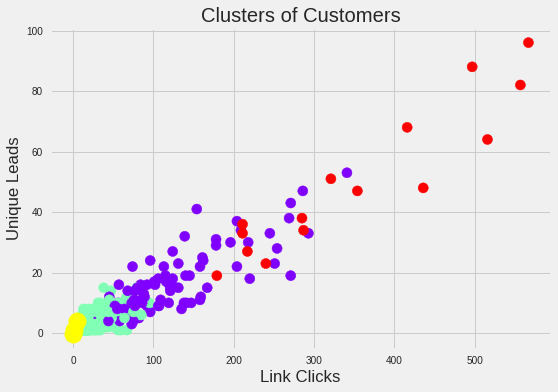

In [371]:
# Visualiza el cluster entre clicks vs los leads unicos obtenidos

plt.scatter(data['Linkclicks'], data['Uniqueleads'], s=100, c=data['labels'], cmap='rainbow')


#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Link Clicks')
plt.ylabel('Unique Leads')
plt.show()

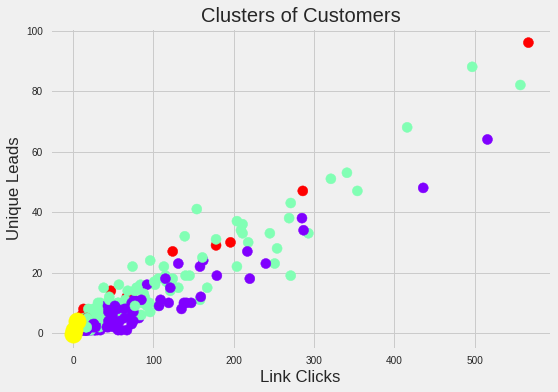

In [373]:
# Visualiza el cluster entre clicks vs los leads unicos obtenidos con el campo de Clasificacion

plt.scatter(data['Linkclicks'], data['Uniqueleads'], s=100, c=data['ClasificacionInt'], cmap='rainbow')


#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Link Clicks')
plt.ylabel('Unique Leads')
plt.show()

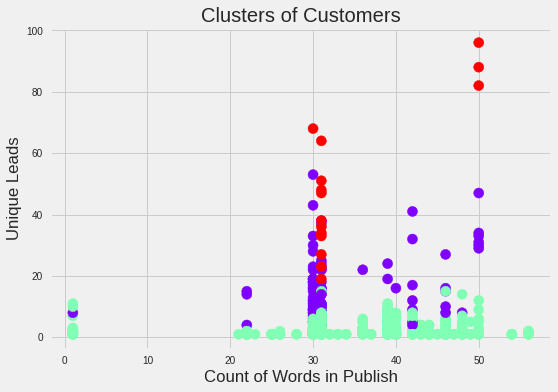

In [374]:
#Visualizando el cluster: numero de palabras vers los leads unicos

plt.scatter(data['NumPalabras'], data['Uniqueleads'], s=100, c=data['labels'], cmap='rainbow')


#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.


plt.title('Clusters of Customers')
plt.xlabel('Count of Words in Publish')
plt.ylabel('Unique Leads')
plt.show()

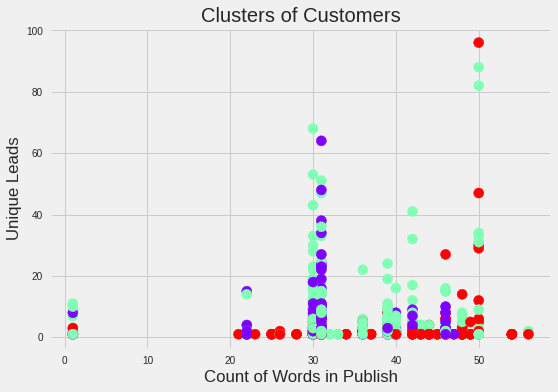

In [376]:
#Visualizando el cluster: numero de palabras vers los leads unicos

plt.scatter(data['NumPalabras'], data['Uniqueleads'], s=100, c=data['ClasificacionInt'], cmap='rainbow')


#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.


plt.title('Clusters of Customers')
plt.xlabel('Count of Words in Publish')
plt.ylabel('Unique Leads')
plt.show()

No es muy clara la separación de los clusters, sin embargo se ve que cuando hay 30 palabras en promedio se obtienen un mayor numero de leads, se graficará considerando el costo y la frecuencia de visita usando plotly

In [377]:
import plotly.express as px

fig = px.scatter(data, x="NumPalabras", y="Uniqueleads", color="labels",
                 size='Cost', hover_data=['Frequency'])
fig.show()

In [378]:
import plotly.express as px

fig = px.scatter(data, x="NumPalabras", y="Uniqueleads", color="ClasificacionInt",
                 size='Cost', hover_data=['Frequency'])
fig.show()

No es muy clara la separación de los clusters, sin embargo se ve que cuando hay 30 palabras en promedio se obtienen un mayor numero de leads, se graficará considerando el costo y la frecuencia de visita usando plotly

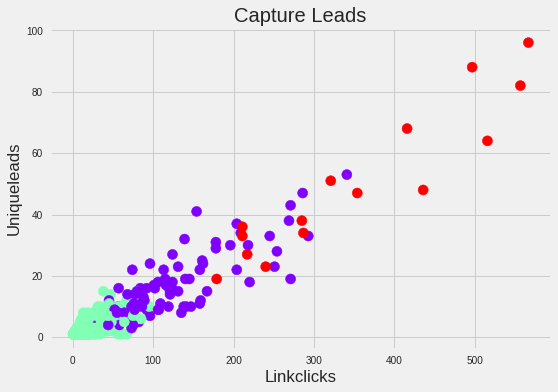

In [383]:
#6 Visualising the clusters

plt.scatter(data['Linkclicks'], data['Uniqueleads'], s=100, c=data['labels'], cmap='rainbow')


#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.

plt.title('Capture Leads')
plt.xlabel('Linkclicks')
plt.ylabel('Uniqueleads')
plt.show()

**Grafico de Cluster - Plotly relacion Clicks y Unique Leads**

In [381]:
import plotly.express as px

fig = px.scatter(data, x="Cost", y="Uniqueleads", color="labels",
                 size='Reach', hover_data=['Linkclicks'])
fig.show()

**Coeficiente de silhohouette**

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

How close the data point is to other points in the cluster
How far away the data point is from points in other clusters
Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In [384]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

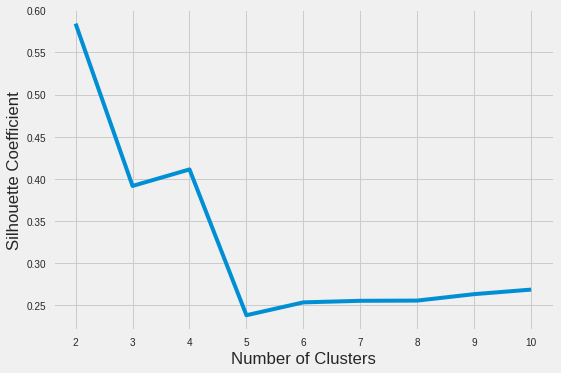

In [385]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
x <- seq(0, 2*pi, length.out=50)
x

 [1] 0.0000000 0.1282283 0.2564565 0.3846848 0.5129131 0.6411414 0.7693696
 [8] 0.8975979 1.0258262 1.1540544 1.2822827 1.4105110 1.5387393 1.6669675
[15] 1.7951958 1.9234241 2.0516523 2.1798806 2.3081089 2.4363372 2.5645654
[22] 2.6927937 2.8210220 2.9492502 3.0774785 3.2057068 3.3339351 3.4621633
[29] 3.5903916 3.7186199 3.8468481 3.9750764 4.1033047 4.2315330 4.3597612
[36] 4.4879895 4.6162178 4.7444460 4.8726743 5.0009026 5.1291309 5.2573591
[43] 5.3855874 5.5138157 5.6420439 5.7702722 5.8985005 6.0267288 6.1549570
[50] 6.2831853


In [ ]:
%%R
print(installed.packages())

              Package         LibPath                         Version   
IRdisplay     "IRdisplay"     "/usr/local/lib/R/site-library" "1.0"     
IRkernel      "IRkernel"      "/usr/local/lib/R/site-library" "1.2"     
pbdZMQ        "pbdZMQ"        "/usr/local/lib/R/site-library" "0.3-5"   
repr          "repr"          "/usr/local/lib/R/site-library" "1.1.3"   
askpass       "askpass"       "/usr/lib/R/site-library"       "1.1"     
assertthat    "assertthat"    "/usr/lib/R/site-library"       "0.2.1"   
backports     "backports"     "/usr/lib/R/site-library"       "1.2.1"   
base64enc     "base64enc"     "/usr/lib/R/site-library"       "0.1-3"   
BH            "BH"            "/usr/lib/R/site-library"       "1.75.0-0"
blob          "blob"          "/usr/lib/R/site-library"       "1.2.1"   
brew          "brew"          "/usr/lib/R/site-library"       "1.0-6"   
brio          "brio"          "/usr/lib/R/site-library"       "1.1.2"   
broom         "broom"         "/usr/lib/R/site-libr

In [ ]:
%%R
install.packages("NbClust")
library(NbClust)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/NbClust_3.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 22211 bytes (21 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to

In [ ]:
%%R

library(NbClust)

In [ ]:
%%R

sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas/liblapack.so.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] NbClust_3.0

loaded via a namespace (and not attached):
[1] compiler_4.1.0


In [ ]:
%%R
install.packages("car") 

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/matrixStats_0.59.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 194487 bytes (189 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]

In [ ]:
%%R
install.packages("factoextra")
library(factoextra)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘lazyeval’, ‘later’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘corrplot’, ‘viridis’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/lazyeval_0.2.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 83482 bytes (81 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]:

# Prediccion  Regression

https://www.kaggle.com/mansimeena/facebook-ad-campaigns-analysis-sales-prediction

https://www.kaggle.com/gauravduttakiit/predicting-stock-prices-using-facebook-s-prophet (Graficas)

https://www.kaggle.com/ymlai87416/web-traffic-time-series-forecast-with-4-model (Entendimiento)

https://www.kaggle.com/zoupet/predictive-analysis-with-different-approaches

https://www.kaggle.com/manovirat/timeseries-using-prophet-hyperparameter-tuning

# OTROS: Analisis de comentarios (si alcanzamos) 

https://www.kaggle.com/mortena/facebook-comments-sentiment-analysis